# Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis (EDA) on the training dataset to understand the data better, visualize relationships between features, and identify any patterns or anomalies.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
df = pd.read_excel('../data/aks_02_dataset-V.03.xlsx')
#test_data = pd.read_csv('../data/test.csv')

# Display the first few rows of the training data
df.head()

,key,namespace,pod-name,pod Instance,node,container,host_ip,pod_ip,uid,cpuUsage,memUsage,cpuRequest,memRequest
0,kube-system/ama-logs-f6skn,kube-system,NaN,ama-logs-f6skn,aks-amlnode12-65770209-vmss00000d,kube-state-metrics,10.57.138.10,10.57.138.100,0ff8ee9c-2587-4ab1-af64-b0b21f31c9e5,0.015320,225280,0.075,235929600
1,kube-system/ama-logs-9ghkp,kube-system,NaN,ama-logs-9ghkp,aks-amlnode12-65770209-vmss000003,kube-state-metrics,10.57.138.120,10.57.138.123,dd077fbb-913e-4da9-a816-062fe4bf556c,0.012919,212992,0.075,235929600
2,kube-system/ama-logs-6k8fs,kube-system,NaN,ama-logs-6k8fs,aks-amlnode12-65770209-vmss000008,kube-state-metrics,10.57.138.149,10.57.138.153,dabe6c14-027c-4df2-b9d7-b6ce1aadee09,0.011636,221184,0.075,235929600
3,kube-system/ama-logs-r6ckz,kube-system,NaN,ama-logs-r6ckz,aks-spotpool-57402725-vmss00001i,kube-state-metrics,10.57.84.100,10.57.84.125,664ad516-13dc-4c89-83dc-1c68f6b8b3d5,0.009440,217088,0.075,235929600
4,kube-system/ama-logs-26hnw,kube-system,NaN,ama-logs-26hnw,aks-fixedpool-14912270-vmss000009,kube-state-metrics,10.57.84.152,10.57.84.160,226ebbfa-2b8a-4429-abde-b36d9d31bdac,0.014263,217088,0.075,235929600


In [5]:
df.describe()

,cpuUsage,memUsage,cpuRequest,memRequest
count,358.000000,3.580000e+02,358.000000,3.580000e+02
mean,0.285967,5.481775e+05,0.085084,1.294048e+08
std,3.431517,3.896096e+06,0.148991,2.040776e+08
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.019009,2.252800e+05,0.010000,2.097152e+07
50%,0.037520,2.293760e+05,0.100000,7.340032e+07
75%,0.044565,2.334720e+05,0.100000,1.073742e+08
max,53.006407,6.510592e+07,1.000000,1.073742e+09


In [6]:
df.dtypes

key              object
namespace        object
pod-name         object
pod Instance     object
node             object
container        object
host_ip          object
pod_ip           object
uid              object
cpuUsage        float64
memUsage          int64
cpuRequest      float64
memRequest        int64
dtype: object

In [7]:
df2=df[['cpuRequest','cpuUsage','memRequest','memUsage']]

In [8]:
df2.corr()

,cpuRequest,cpuUsage,memRequest,memUsage
cpuRequest,1.000000,0.205935,0.794834,0.198806
cpuUsage,0.205935,1.000000,0.342379,0.988396
memRequest,0.794834,0.342379,1.000000,0.339904
memUsage,0.198806,0.988396,0.339904,1.000000


In [9]:
df_pod_cpu=df[['cpuRequest','cpuUsage']]

In [10]:
df_pod_cpu.corr()

,cpuRequest,cpuUsage
cpuRequest,1.000000,0.205935
cpuUsage,0.205935,1.000000


<Axes: >

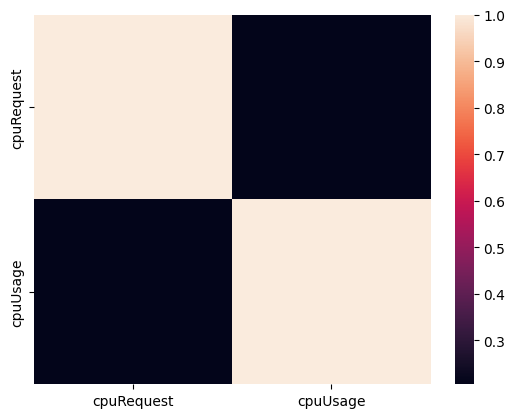

In [11]:
sns.heatmap(df_pod_cpu.corr())

In [14]:
from pycaret.regression import *
exp = setup(data=df, target='cpuRequest', session_id=123)

,Description,Value
0,Session id,123
1,Target,cpuRequest
2,Target type,Regression
3,Original data shape,"(358, 13)"
4,Transformed data shape,"(358, 36)"
5,Transformed train set shape,"(250, 36)"
6,Transformed test set shape,"(108, 36)"
7,Numeric features,3
8,Categorical features,9
9,Rows with missing values,97.2%
